In [4]:
import sys, os, importlib.util
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd

from scipy.constants import lambda2nu, nu2lambda, c
from scipy.interpolate import interp1d
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset

In [5]:
from IPython.core.display import HTML
from IPython.core.pylabtools import figsize
from IPython.display import display, Math

In [31]:
lumapiFile = "C:\\Program Files\\Lumerical\\v221\\api\\python\\lumapi.py"
spec = importlib.util.spec_from_file_location("lumapi", lumapiFile)
lumapi = importlib.util.module_from_spec(spec)
spec.loader.exec_module(lumapi)

fdtdApi = lumapi.FDTD(hide = False)

In [10]:
um = 1e-6
nm = 1e-9

In [11]:
material_waveguide = 'Si (Silicon) - Palik'
material_background = 'SiO2 (Glass) - Palik'

In [12]:
n_c = 1.444
n_r = 3.476
lmbd = 1550*nm
W_m = 7*um
L = 58.75*um

In [13]:
altura = 220*nm
espessura = 450*nm
comprimento = 2*um
comprimento_taper = 15*um
espessura_taper = 1.5*um

In [14]:
start_wavelength = 1530*nm
stop_wavelength = 1570*nm
num_frequency_points = 21

mesh_accuracy = 2

time_simulation = (L + 2*comprimento_taper + 2*comprimento)*7/c + 200e-15

In [15]:
x_MMI = 0
y_MMI = 0
z_MMI = 0

x_taper = L/2 + comprimento_taper/2
y_taper = W_m/6
z_taper = z_MMI

x_waveguide =  L/2 + comprimento_taper + comprimento/2
y_waveguide = y_taper
z_waveguide = z_taper

x_solver_span = L + comprimento_taper*2 + comprimento*2
y_solver_span = W_m*2.5
z_solver_span = altura*15

port_span = 2*um

In [38]:
fdtdApi.switchtolayout()

fdtdApi.select('GDS_LAYER_35:4')
fdtdApi.delete()

fdtdApi.addstructuregroup()
dev_layer = 'GDS_LAYER_35:4'
fdtdApi.set('name', dev_layer)

In [39]:
fdtdApi.switchtolayout()

fdtdApi.select(f'{dev_layer}::Box')
fdtdApi.delete()

fdtdApi.addrect()
fdtdApi.addtogroup(dev_layer)
fdtdApi.set('name', 'Box')
fdtdApi.set('x span', L)
fdtdApi.set('y span', W_m)
fdtdApi.set('z span', altura)
fdtdApi.set('x', x_MMI)
fdtdApi.set('y', y_MMI)
fdtdApi.set('z', z_MMI)
fdtdApi.set('material', material_waveguide)

In [40]:
fdtdApi.switchtolayout()

fdtdApi.select(f'{dev_layer}::Taper_00')
fdtdApi.delete()
fdtdApi.select(f'{dev_layer}::Taper_01')
fdtdApi.delete()
fdtdApi.select(f'{dev_layer}::Taper_10')
fdtdApi.delete()
fdtdApi.select(f'{dev_layer}::Taper_11')
fdtdApi.delete()

fdtdApi.addobject('linear_taper')
fdtdApi.addtogroup(dev_layer)
fdtdApi.set('name', 'Taper_01')
fdtdApi.set('angle_side', 90)
fdtdApi.set('thickness', altura)
fdtdApi.set("width_l", espessura_taper)
fdtdApi.set("width_r", espessura)
fdtdApi.set("len", comprimento_taper)
fdtdApi.set("material", material_waveguide)
fdtdApi.set("x", x_taper)
fdtdApi.set("y", y_taper)
fdtdApi.set("z", z_taper)

fdtdApi.copy()
fdtdApi.set('name', 'Taper_11')
fdtdApi.set("y", -y_taper)

fdtdApi.copy()
fdtdApi.set('name', 'Taper_00')
fdtdApi.set("width_l", espessura)
fdtdApi.set("width_r", espessura_taper)
fdtdApi.set("x", -x_taper)
fdtdApi.set("y", y_taper)

fdtdApi.copy()
fdtdApi.set('name', 'Taper_10')
fdtdApi.set("width_l", espessura)
fdtdApi.set("width_r", espessura_taper)
fdtdApi.set("y", -y_taper)

In [41]:
fdtdApi.switchtolayout()

fdtdApi.select(f'{dev_layer}::Waveguide_00')
fdtdApi.delete()
fdtdApi.select(f'{dev_layer}::Waveguide_01')
fdtdApi.delete()
fdtdApi.select(f'{dev_layer}::Waveguide_10')
fdtdApi.delete()
fdtdApi.select(f'{dev_layer}::Waveguide_11')
fdtdApi.delete()

fdtdApi.addrect()
fdtdApi.addtogroup(dev_layer)
fdtdApi.set('name','Waveguide_01')
fdtdApi.set('x span', comprimento)
fdtdApi.set('y span', espessura)
fdtdApi.set('z span', altura)
fdtdApi.set('x', x_waveguide)
fdtdApi.set('y', y_waveguide)
fdtdApi.set('z', z_waveguide)
fdtdApi.set('material', material_waveguide)

fdtdApi.copy()
fdtdApi.set('name','Waveguide_11')
fdtdApi.set('y', -y_waveguide)

fdtdApi.copy()
fdtdApi.set('name','Waveguide_00')
fdtdApi.set('x', -x_waveguide)
fdtdApi.set('y', y_waveguide)

fdtdApi.copy()
fdtdApi.set('name','Waveguide_10')
fdtdApi.set('y', -y_waveguide)

In [42]:
fdtdApi.switchtolayout()

fdtdApi.select('FDTD')
fdtdApi.delete()

fdtdApi.addfdtd()
fdtdApi.set('background material', material_background)

fdtdApi.set('x', x_MMI)
fdtdApi.set('y', y_MMI)
fdtdApi.set('z', z_MMI)
fdtdApi.set('x span', x_solver_span)
fdtdApi.set('y span', y_solver_span)
fdtdApi.set('z span', z_solver_span)

fdtdApi.set('mesh accuracy', mesh_accuracy)
fdtdApi.set('simulation time', time_simulation)

fdtdApi.set('x min bc', 'PML')
fdtdApi.set('x max bc', 'PML')
fdtdApi.set('y min bc', 'PML')
fdtdApi.set('y max bc', 'PML')
fdtdApi.set('z min bc', 'Symmetric')
fdtdApi.set('z max bc', 'PML')

fdtdApi.set('global source wavelength start', start_wavelength)
fdtdApi.set('global source wavelength stop', stop_wavelength)

In [43]:
fdtdApi.switchtolayout()

fdtdApi.select('FDTD::ports')
fdtdApi.delete()

fdtdApi.addport()
fdtdApi.set('name', 'port_00')
fdtdApi.set('injection axis', 'x-axis')
fdtdApi.set('x', -(L/2 + comprimento_taper))
fdtdApi.set('y', y_taper)
fdtdApi.set('y span', port_span)
fdtdApi.set('z', z_MMI)
fdtdApi.set('z span', port_span)
fdtdApi.set('direction', 'Forward')
fdtdApi.set('mode selection', 'fundamental TE mode')

fdtdApi.copy()
fdtdApi.set('name', 'port_01')
fdtdApi.set('x', (L/2 + comprimento_taper))
fdtdApi.set('direction', 'Backward')

fdtdApi.copy()
fdtdApi.set('name', 'port_10')
fdtdApi.set('x',-(L/2 + comprimento_taper))
fdtdApi.set('y', -y_taper)
fdtdApi.set('direction', 'Forward')

fdtdApi.copy()
fdtdApi.set('name', 'port_11')
fdtdApi.set('x', (L/2 + comprimento_taper))
fdtdApi.set('direction', 'Backward')

fdtdApi.select('FDTD::ports')
fdtdApi.set('monitor frequency points', num_frequency_points)

In [44]:
fdtdApi.switchtolayout()

fdtdApi.select('Monitor_E')
fdtdApi.delete()

fdtdApi.addprofile()
fdtdApi.set('name', 'Monitor_E')
fdtdApi.set('override global monitor settings', True)
fdtdApi.set('frequency points', num_frequency_points)
fdtdApi.set('x', x_MMI)
fdtdApi.set('y', y_MMI)
fdtdApi.set('z', z_MMI)
fdtdApi.set("x span", x_solver_span)
fdtdApi.set("y span", y_solver_span)

In [45]:
filename = 'FSimulacao MMI - FDTD'
fdtdApi.save(filename)

In [46]:
fdtdApi.run(3)

In [47]:
E = fdtdApi.getresult('Monitor_E', 'E')

x = E['x']
x = x[:,0]/um

y = E['y']
y = y[:,0]/um

z = E['z']
E = E['E']

Ex = E[:,:,0,:,0]
Ey = E[:,:,0,:,1]
Ez = E[:,:,0,:,2]

Emag = np.sqrt(np.abs(Ex)**2 + np.abs(Ey)**2 + Ez**2)

C:\Users\edilb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\contour.py:1515: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmax = z.max().astype(float)
C:\Users\edilb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\contour.py:1516: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmin = z.min().astype(float)
C:\Users\edilb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\ma\core.py:2881: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,


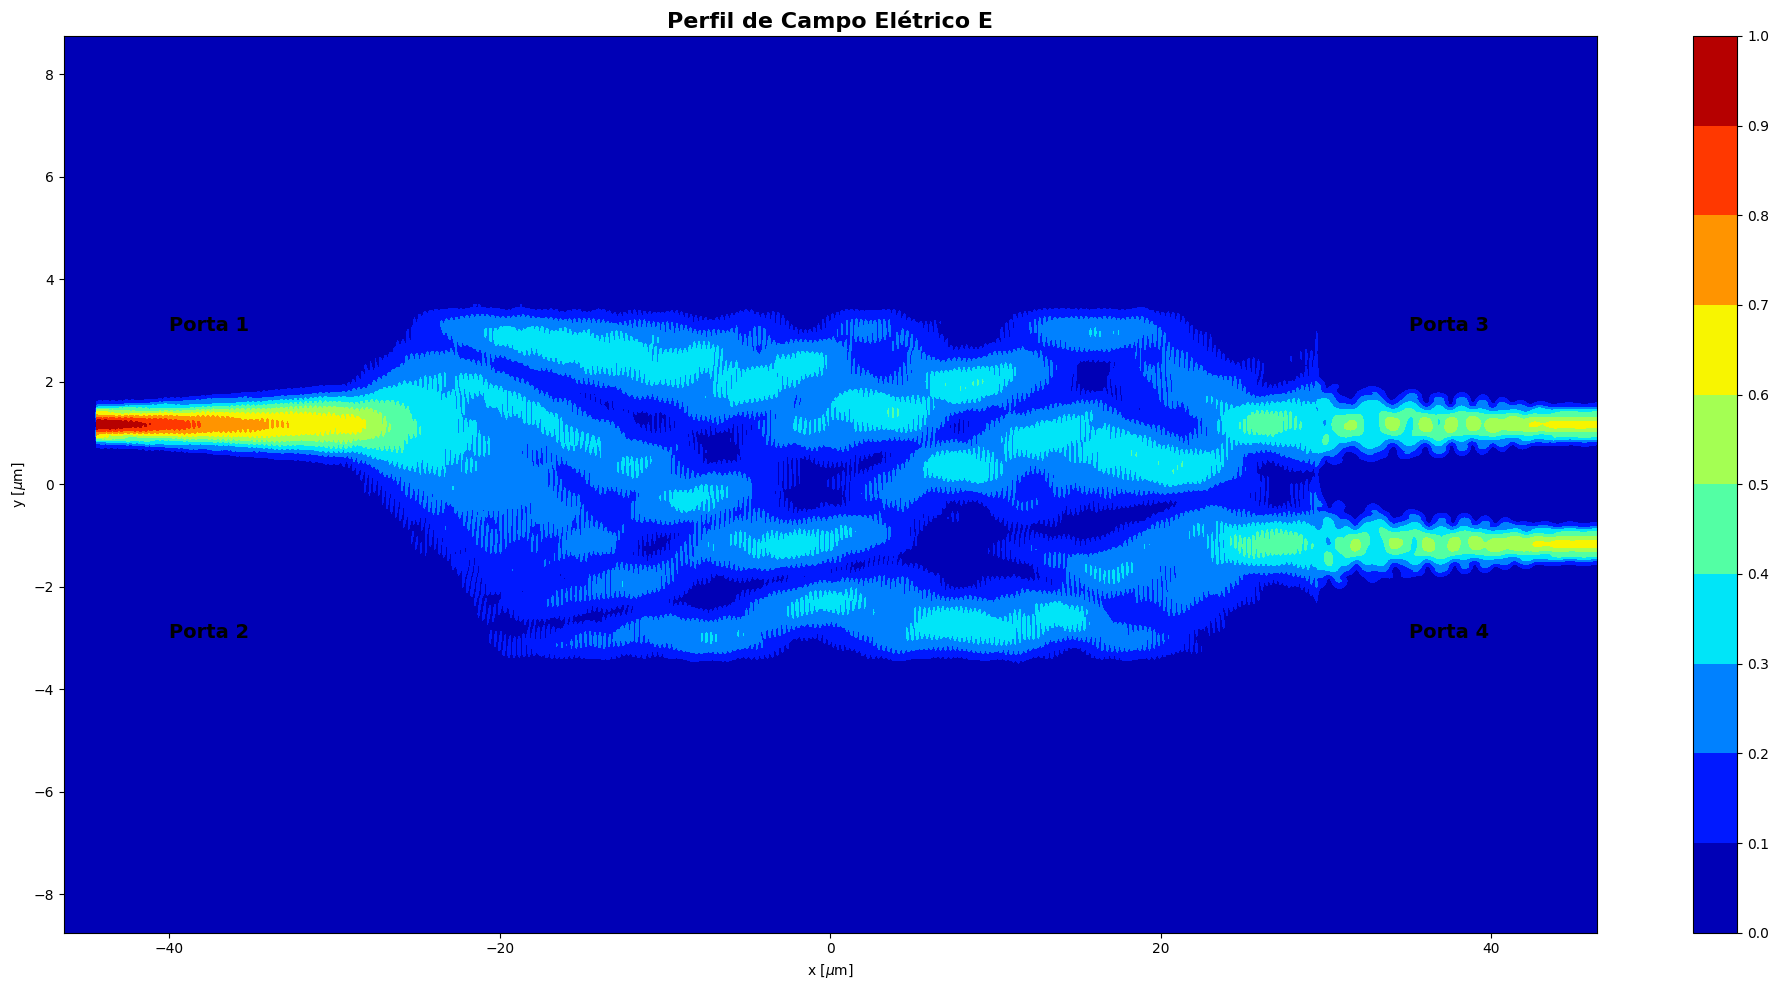

In [48]:
plt.figure(figsize=(20, 10))
mycmap = plt.get_cmap('jet')

v = np.linspace(0,1,11,endpoint=True)

plt.contourf(x,y,np.clip(np.transpose(Emag[:,:,0]), v.min(), v.max()),v,cmap = mycmap)
plt.colorbar(ticks=v)

plt.title('Perfil de Campo Elétrico E', fontsize = 16, fontweight = 'bold',)
plt.ylabel(r'y [$\mu$m]')
plt.xlabel(r'x [$\mu$m]')

plt.text(-40, 3, 'Porta 1', fontsize = 14, fontweight = 'bold', color = 'k')
plt.text(-40, -3, 'Porta 2', fontsize = 14, fontweight = 'bold', color = 'k')
plt.text(35, 3, 'Porta 3', fontsize = 14, fontweight = 'bold', color = 'k')
plt.text(35, -3, 'Porta 4', fontsize = 14, fontweight = 'bold', color = 'k')

plt.tight_layout()
plt.savefig('Perfil de Campo Elétrico - Linear - FDTD - TE.png')
plt.show()

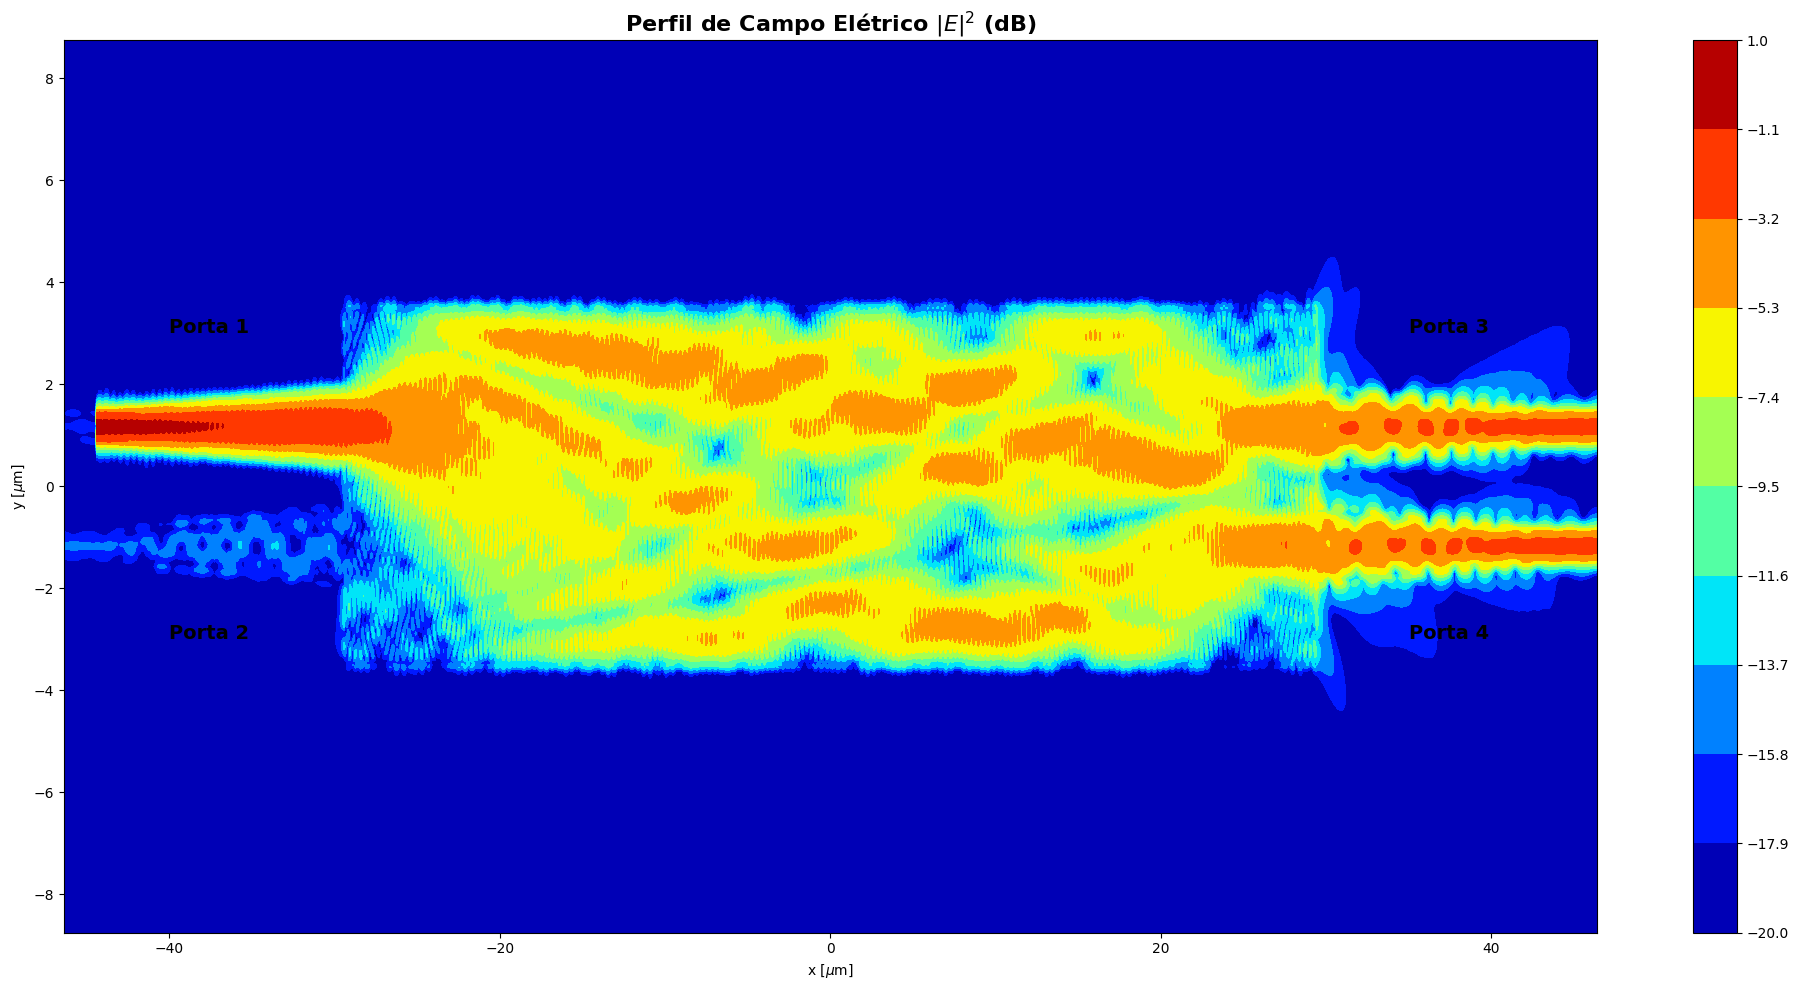

In [49]:
plt.figure(figsize=(20, 10))
mycmap = plt.get_cmap('jet')

v = np.linspace(-20,1,11,endpoint=True)

plt.contourf(x,y,np.clip(10*np.log10(np.transpose(Emag[:,:,0])), v.min(), v.max()),v,cmap = mycmap)
plt.colorbar(ticks=v)

plt.title(r'Perfil de Campo Elétrico $|E|^2$ (dB)', fontsize = 16,  fontweight = 'bold',)
plt.ylabel(r'y [$\mu$m]')
plt.xlabel(r'x [$\mu$m]')

plt.text(-40, 3, 'Porta 1', fontsize = 14, fontweight = 'bold', color = 'k')
plt.text(-40, -3, 'Porta 2', fontsize = 14, fontweight = 'bold', color = 'k')
plt.text(35, 3, 'Porta 3', fontsize = 14, fontweight = 'bold', color = 'k')
plt.text(35, -3, 'Porta 4', fontsize = 14, fontweight = 'bold', color = 'k')

plt.tight_layout()
plt.savefig('Perfil de Campo Elétrico - LOG - FDTD - TE.png')
plt.show()

In [50]:
trans_00 = fdtdApi.getresult('FDTD::ports::port_00', 'T')
trans_01 = fdtdApi.getresult('FDTD::ports::port_01', 'T')
trans_10 = fdtdApi.getresult('FDTD::ports::port_10', 'T')
trans_11 = fdtdApi.getresult('FDTD::ports::port_11', 'T')

trans_00_dB = 10*np.log10(np.abs(trans_00['T']))
trans_01_dB = 10*np.log10(np.abs(trans_01['T']))
trans_10_dB = 10*np.log10(np.abs(trans_10['T']))
trans_11_dB = 10*np.log10(np.abs(trans_11['T']))

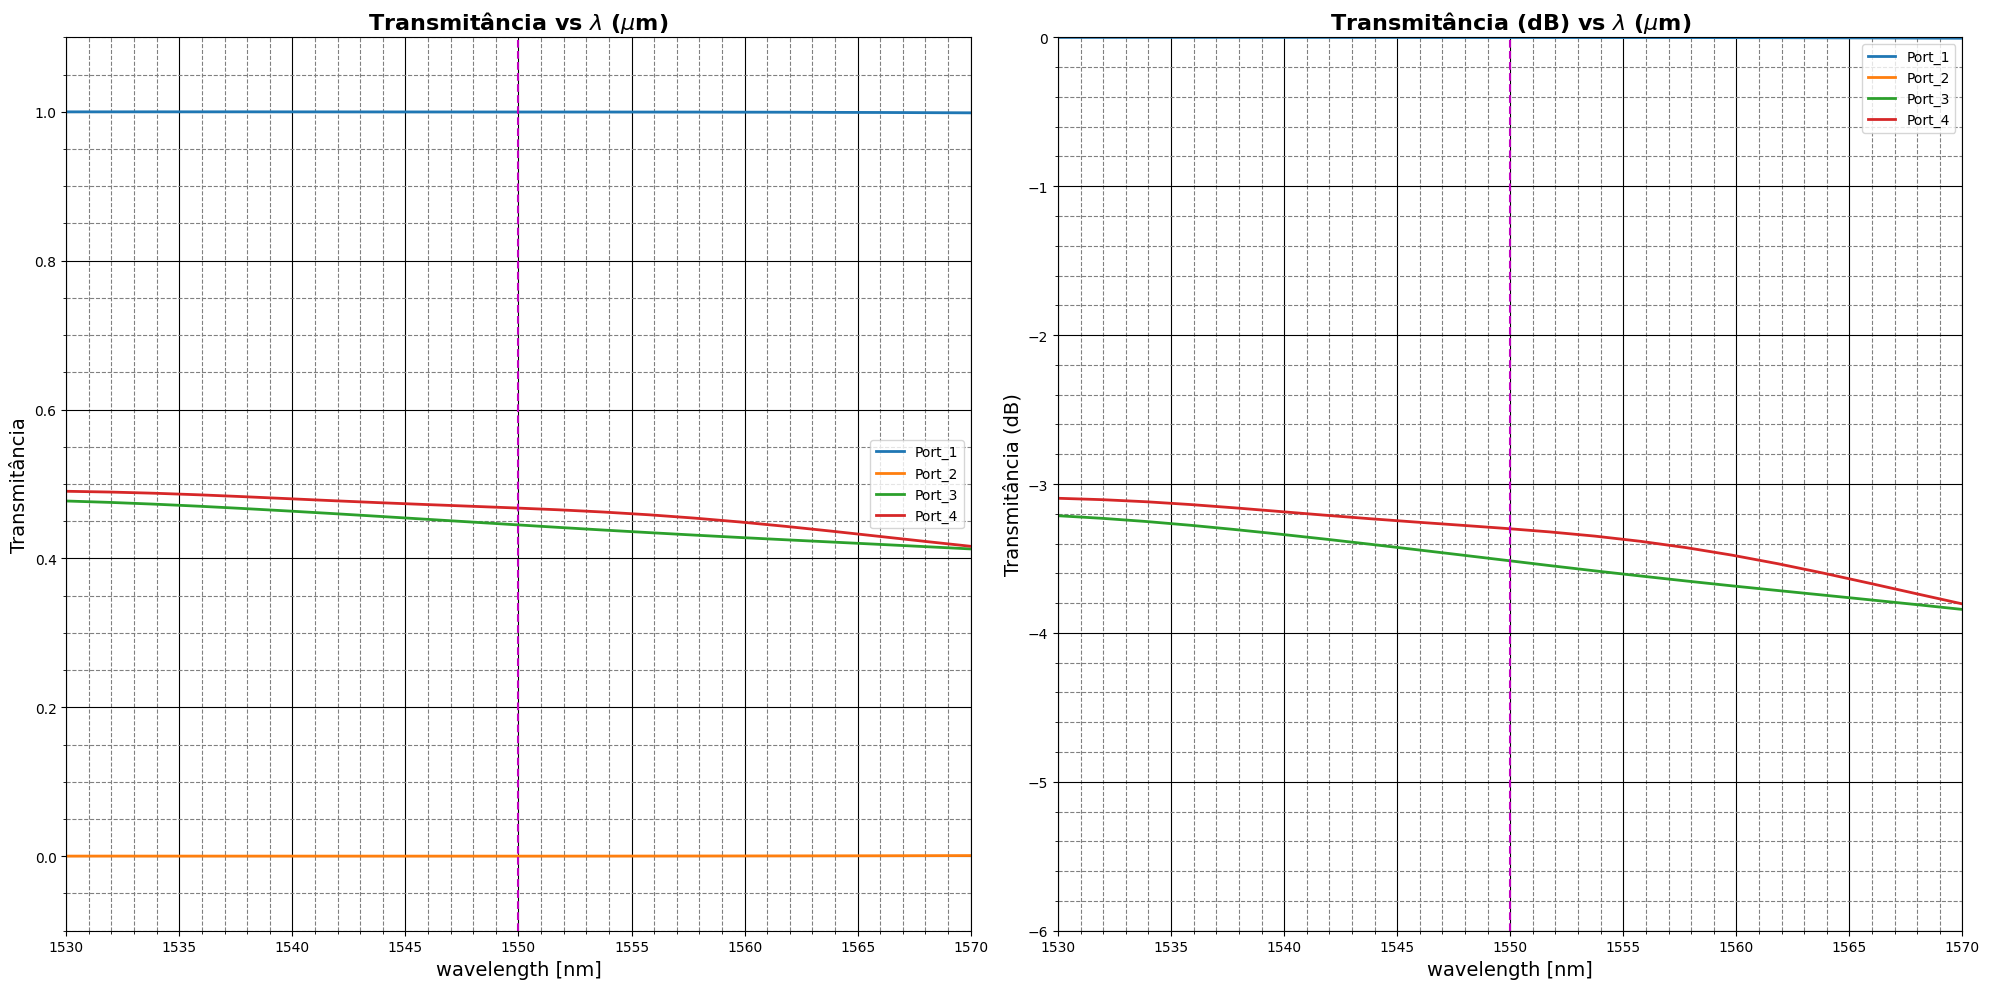

In [51]:
valor_lambda = 1550

fig3, axs = plt.subplots(1, 2, figsize=(20, 10))

axs[0].plot(trans_00['lambda']/nm, np.abs(trans_00['T']), label = 'Port_1', linewidth=2)
axs[0].plot(trans_10['lambda']/nm, np.abs(trans_10['T']), label = 'Port_2', linewidth=2)
axs[0].plot(trans_01['lambda']/nm, np.abs(trans_01['T']), label = 'Port_3', linewidth=2)
axs[0].plot(trans_11['lambda']/nm, np.abs(trans_11['T']), label = 'Port_4', linewidth=2)
axs[0].axvline(x=valor_lambda, color='m', linestyle='--')
axs[0].set_xlabel(r'wavelength [nm]', fontsize=14)
axs[0].set_ylabel('Transmitância', fontsize=14)
axs[0].set_xlim([start_wavelength/nm, stop_wavelength/nm])
axs[0].set_ylim([-0.1,1.1])
axs[0].set_title(r'Transmitância vs $\lambda$ ($\mu$m)', fontsize=16, fontweight = 'bold',)
axs[0].legend()
axs[0].grid(which='major', color='black', linestyle='-')
axs[0].grid(which='minor', color='gray', linestyle='--')
axs[0].minorticks_on()

axs[1].plot(trans_00['lambda']/nm, 10*np.log10(np.abs(trans_00['T'])), label = 'Port_1', linewidth=2)
axs[1].plot(trans_10['lambda']/nm, 10*np.log10(np.abs(trans_10['T'])), label = 'Port_2', linewidth=2)
axs[1].plot(trans_01['lambda']/nm, 10*np.log10(np.abs(trans_01['T'])), label = 'Port_3', linewidth=2)
axs[1].plot(trans_11['lambda']/nm, 10*np.log10(np.abs(trans_11['T'])), label = 'Port_4', linewidth=2)
axs[1].axvline(x=valor_lambda, color='m', linestyle='--')
axs[1].set_xlabel(r'wavelength [nm]', fontsize=14)
axs[1].set_ylabel('Transmitância (dB)', fontsize=14)
axs[1].set_xlim([start_wavelength/nm, stop_wavelength/nm])
axs[1].set_ylim([-6,0])
axs[1].set_title(r'Transmitância (dB) vs $\lambda$ ($\mu$m)', fontsize=16, fontweight = 'bold',)
axs[1].legend()
axs[1].grid(which='major', color='black', linestyle='-')
axs[1].grid(which='minor', color='gray', linestyle='--')
axs[1].minorticks_on()

plt.tight_layout()
plt.savefig('Transmissão nas portas - FDTD - TE.png')
plt.show()

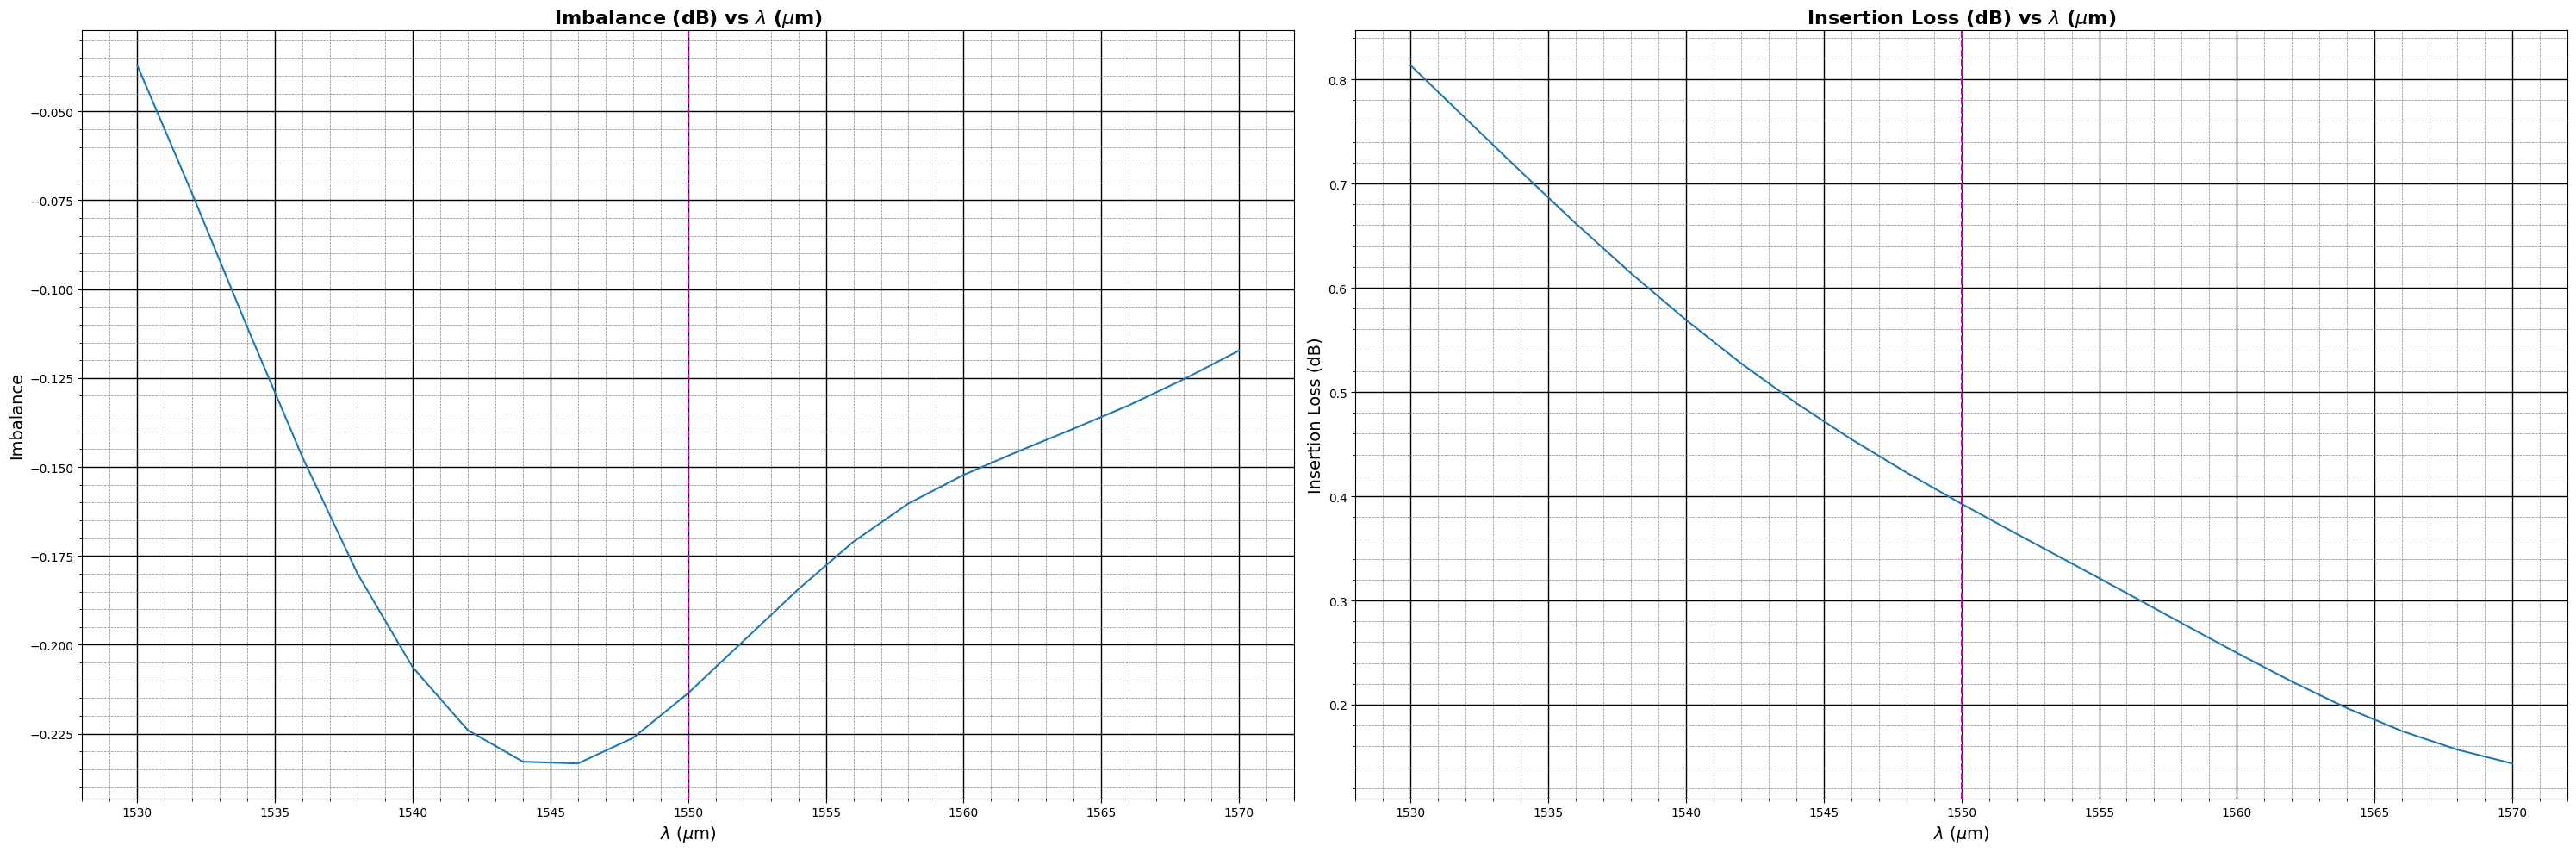

In [52]:
fig, axs = plt.subplots(1, 2, figsize=(30, 10))

Lambda = np.linspace(start_wavelength, stop_wavelength, num_frequency_points, endpoint=True)

Ib = trans_01_dB - trans_11_dB
axs[0].plot(Lambda/nm, Ib, lw=1.5)
axs[0].set_xlabel(r'$\lambda$ ($\mu$m)', fontsize=14)
axs[0].set_ylabel('Imbalance', fontsize=14)
axs[0].set_title(r'Imbalance (dB) vs $\lambda$ ($\mu$m)', fontsize=16, fontweight = 'bold')
axs[0].grid(True, which='major', linestyle='-', linewidth=1, color='black')
axs[0].grid(True, which='minor', linestyle='--', linewidth=0.5, color='gray')
axs[0].minorticks_on()
axs[0].axvline(x=lmbd/nm, color='m', linestyle='--')

Il = -10*np.log10(trans_01['T'] + trans_11['T'])
axs[1].plot(Lambda/nm, Il, lw=1.5)
axs[1].set_xlabel(r'$\lambda$ ($\mu$m)', fontsize=14)
axs[1].set_ylabel('Insertion Loss (dB)', fontsize=14)
axs[1].set_title(r'Insertion Loss (dB) vs $\lambda$ ($\mu$m)', fontsize=16, fontweight = 'bold')
axs[1].grid(True, which='major', linestyle='-', linewidth=1, color='black')
axs[1].grid(True, which='minor', linestyle='--', linewidth=0.5, color='gray')
axs[1].minorticks_on()
axs[1].axvline(x=lmbd/nm, color='m', linestyle='--')

plt.tight_layout()
plt.savefig('Imbalance e Perda de Inserção nas portas - FDTD - TE.png')
plt.show()

In [53]:
fdtdApi.switchtolayout()

fdtdApi.select('FDTD')
fdtdApi.set('z min bc', 'Anti-Symmetric')

fdtdApi.select('FDTD::ports::port_00')
fdtdApi.set('mode selection', 'fundamental TM mode')
fdtdApi.select('FDTD::ports::port_01')
fdtdApi.set('mode selection', 'fundamental TM mode')
fdtdApi.select('FDTD::ports::port_10')
fdtdApi.set('mode selection', 'fundamental TM mode')
fdtdApi.select('FDTD::ports::port_11')
fdtdApi.set('mode selection', 'fundamental TM mode')

fdtdApi.save(filename)

In [54]:
fdtdApi.run(3)

In [55]:
E = fdtdApi.getresult('Monitor_E', 'E')

x = E['x']
x = x[:,0]/um

y = E['y']
y = y[:,0]/um

z = E['z']
E = E['E']

Ex = E[:,:,0,:,0]
Ey = E[:,:,0,:,1]
Ez = E[:,:,0,:,2]

Emag = np.sqrt(np.abs(Ex)**2 + np.abs(Ey)**2 + Ez**2)

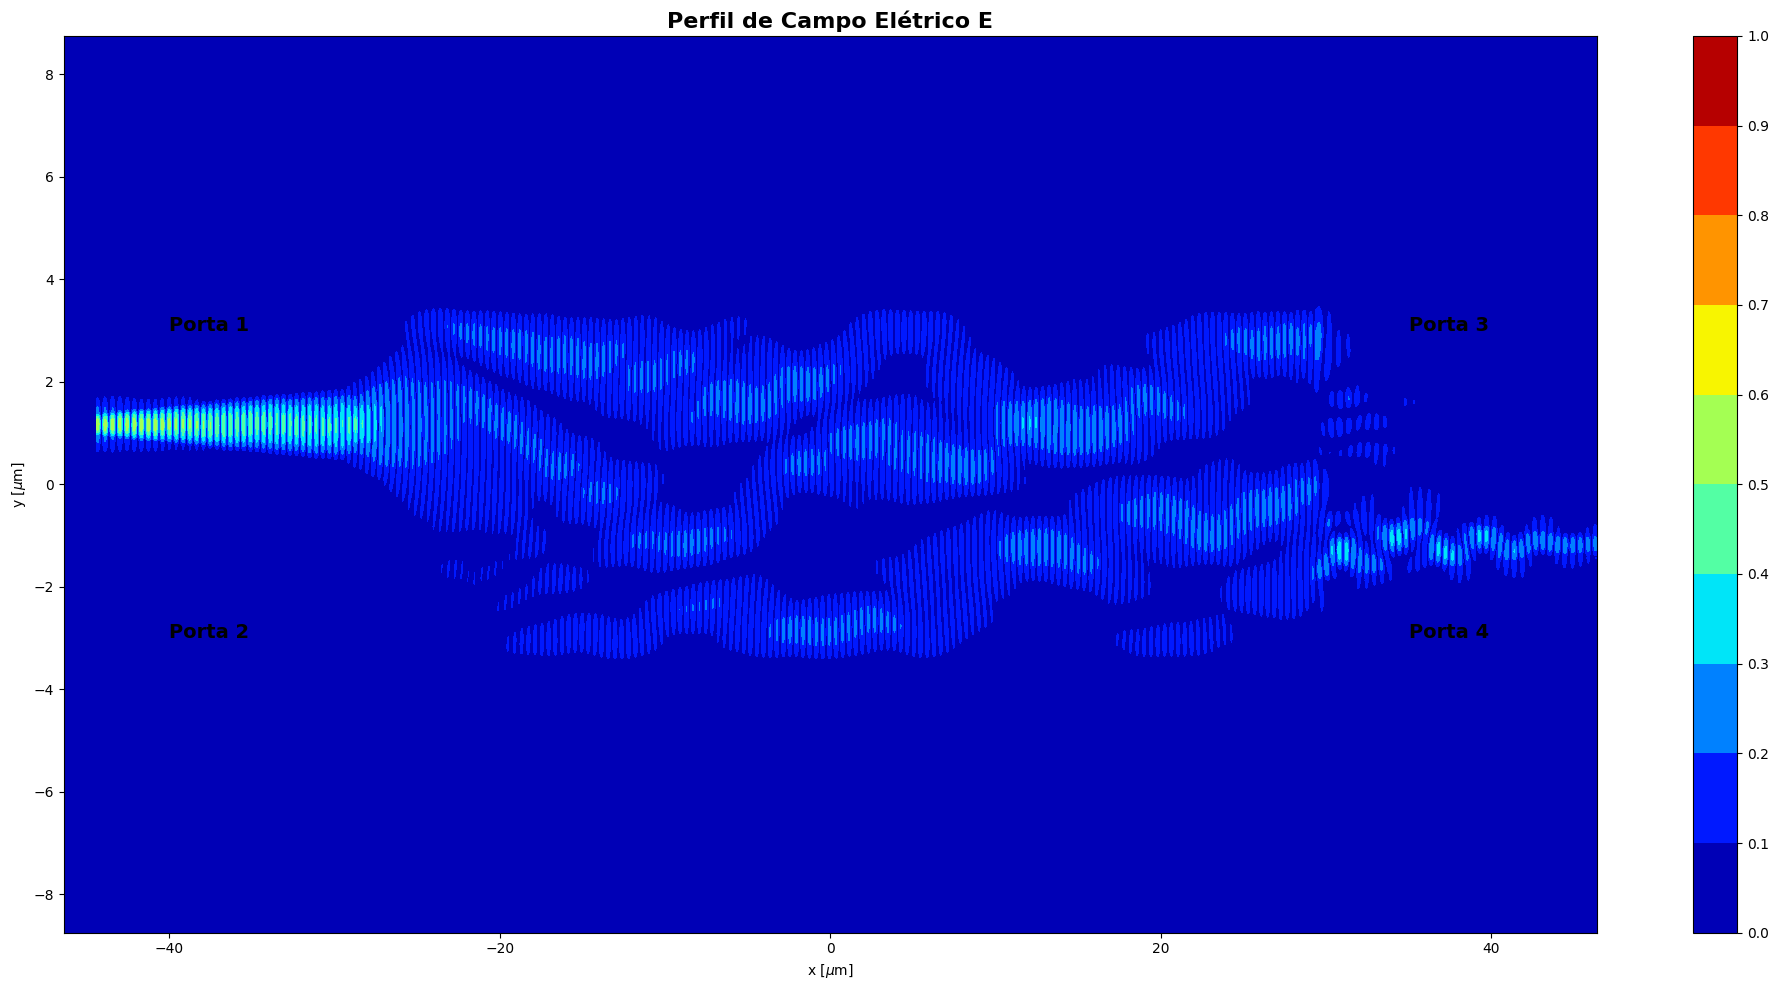

In [56]:
plt.figure(figsize=(20, 10))
mycmap = plt.get_cmap('jet')

v = np.linspace(0,1,11,endpoint=True)

plt.contourf(x,y,np.clip(np.transpose(Emag[:,:,0]), v.min(), v.max()),v,cmap = mycmap)
plt.colorbar(ticks=v)

plt.title('Perfil de Campo Elétrico E', fontsize = 16, fontweight = 'bold',)
plt.ylabel(r'y [$\mu$m]')
plt.xlabel(r'x [$\mu$m]')

plt.text(-40, 3, 'Porta 1', fontsize = 14, fontweight = 'bold', color = 'k')
plt.text(-40, -3, 'Porta 2', fontsize = 14, fontweight = 'bold', color = 'k')
plt.text(35, 3, 'Porta 3', fontsize = 14, fontweight = 'bold', color = 'k')
plt.text(35, -3, 'Porta 4', fontsize = 14, fontweight = 'bold', color = 'k')

plt.tight_layout()
plt.savefig('Perfil de Campo Elétrico - Linear - FDTD - TM.png')
plt.show()

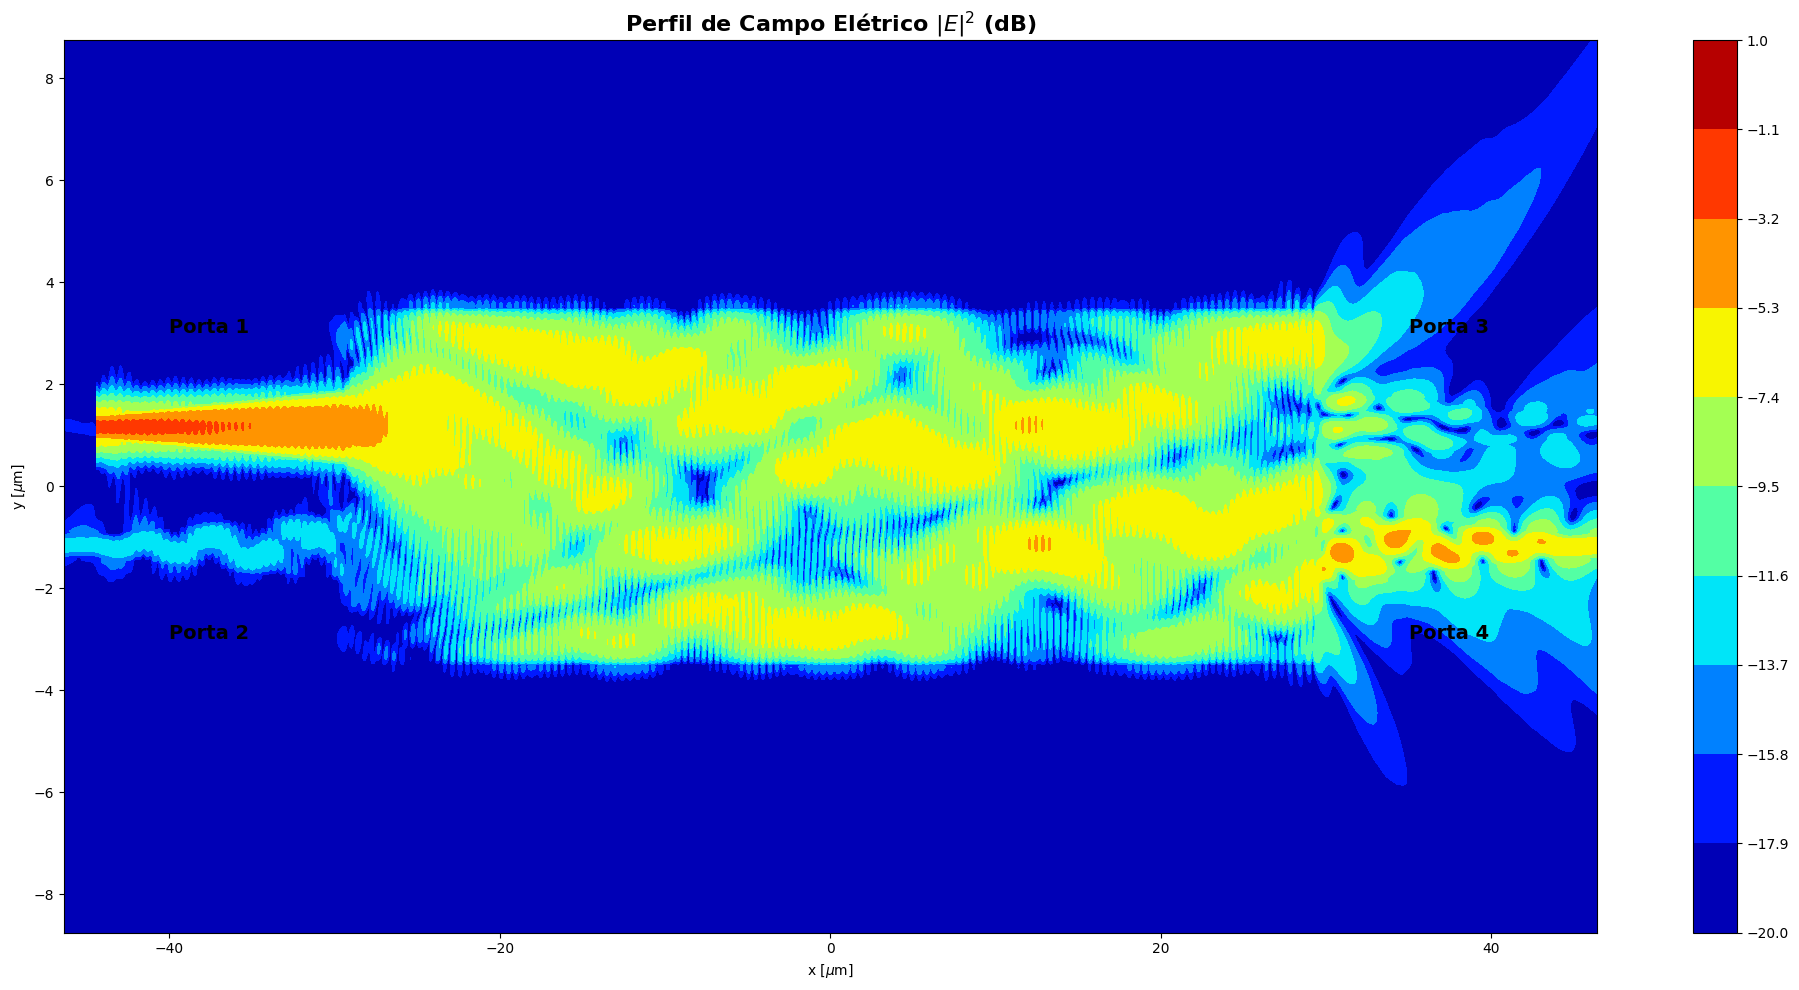

In [57]:
plt.figure(figsize=(20, 10))
mycmap = plt.get_cmap('jet')

v = np.linspace(-20,1,11,endpoint=True)

plt.contourf(x,y,np.clip(10*np.log10(np.transpose(Emag[:,:,0])), v.min(), v.max()),v,cmap = mycmap)
plt.colorbar(ticks=v)

plt.title(r'Perfil de Campo Elétrico $|E|^2$ (dB)', fontsize = 16,  fontweight = 'bold',)
plt.ylabel(r'y [$\mu$m]')
plt.xlabel(r'x [$\mu$m]')

plt.text(-40, 3, 'Porta 1', fontsize = 14, fontweight = 'bold', color = 'k')
plt.text(-40, -3, 'Porta 2', fontsize = 14, fontweight = 'bold', color = 'k')
plt.text(35, 3, 'Porta 3', fontsize = 14, fontweight = 'bold', color = 'k')
plt.text(35, -3, 'Porta 4', fontsize = 14, fontweight = 'bold', color = 'k')

plt.tight_layout()
plt.savefig('Perfil de Campo Elétrico - LOG - FDTD - TM.png')
plt.show()

In [58]:
trans_00 = fdtdApi.getresult('FDTD::ports::port_00', 'T')
trans_01 = fdtdApi.getresult('FDTD::ports::port_01', 'T')
trans_10 = fdtdApi.getresult('FDTD::ports::port_10', 'T')
trans_11 = fdtdApi.getresult('FDTD::ports::port_11', 'T')

trans_00_dB = 10*np.log10(np.abs(trans_00['T']))
trans_01_dB = 10*np.log10(np.abs(trans_01['T']))
trans_10_dB = 10*np.log10(np.abs(trans_10['T']))
trans_11_dB = 10*np.log10(np.abs(trans_11['T']))

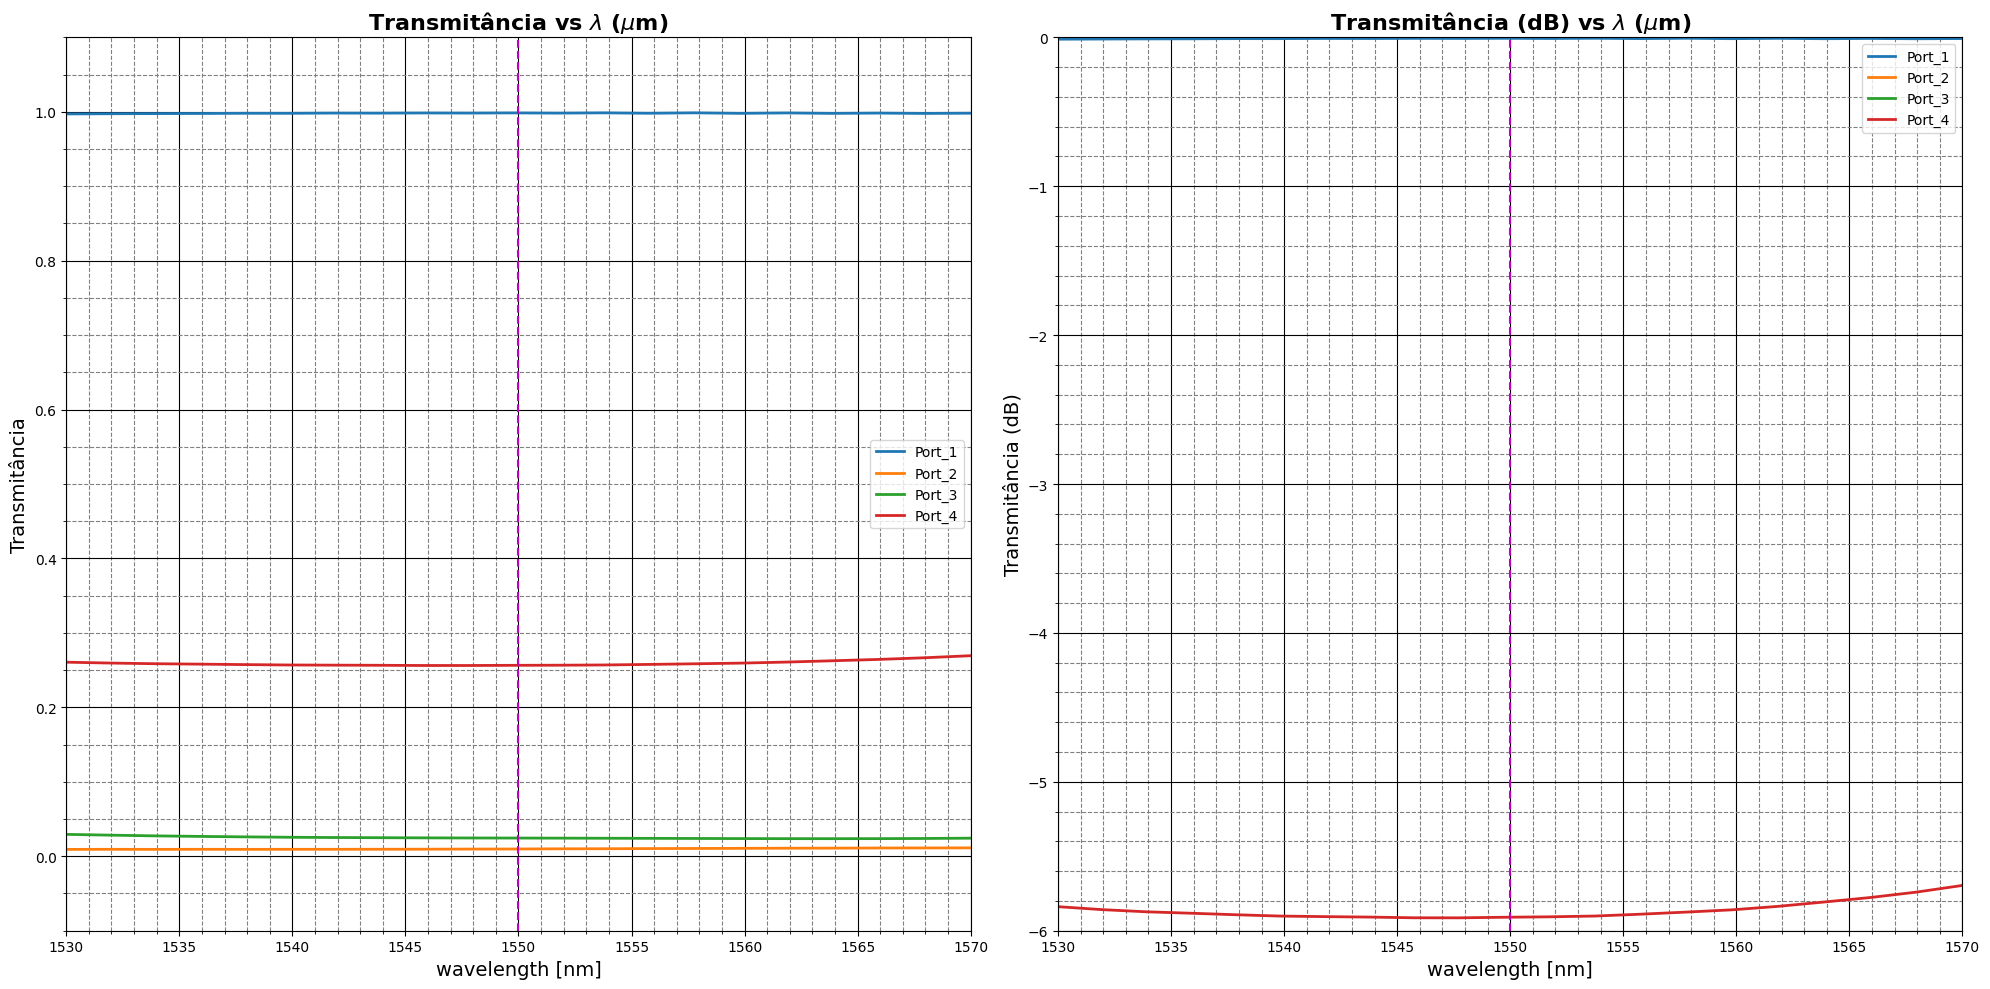

In [59]:
valor_lambda = 1550

fig3, axs = plt.subplots(1, 2, figsize=(20, 10))

axs[0].plot(trans_00['lambda']/nm, np.abs(trans_00['T']), label = 'Port_1', linewidth=2)
axs[0].plot(trans_10['lambda']/nm, np.abs(trans_10['T']), label = 'Port_2', linewidth=2)
axs[0].plot(trans_01['lambda']/nm, np.abs(trans_01['T']), label = 'Port_3', linewidth=2)
axs[0].plot(trans_11['lambda']/nm, np.abs(trans_11['T']), label = 'Port_4', linewidth=2)
axs[0].axvline(x=valor_lambda, color='m', linestyle='--')
axs[0].set_xlabel(r'wavelength [nm]', fontsize=14)
axs[0].set_ylabel('Transmitância', fontsize=14)
axs[0].set_xlim([start_wavelength/nm, stop_wavelength/nm])
axs[0].set_ylim([-0.1,1.1])
axs[0].set_title(r'Transmitância vs $\lambda$ ($\mu$m)', fontsize=16, fontweight = 'bold',)
axs[0].legend()
axs[0].grid(which='major', color='black', linestyle='-')
axs[0].grid(which='minor', color='gray', linestyle='--')
axs[0].minorticks_on()

axs[1].plot(trans_00['lambda']/nm, 10*np.log10(np.abs(trans_00['T'])), label = 'Port_1', linewidth=2)
axs[1].plot(trans_10['lambda']/nm, 10*np.log10(np.abs(trans_10['T'])), label = 'Port_2', linewidth=2)
axs[1].plot(trans_01['lambda']/nm, 10*np.log10(np.abs(trans_01['T'])), label = 'Port_3', linewidth=2)
axs[1].plot(trans_11['lambda']/nm, 10*np.log10(np.abs(trans_11['T'])), label = 'Port_4', linewidth=2)
axs[1].axvline(x=valor_lambda, color='m', linestyle='--')
axs[1].set_xlabel(r'wavelength [nm]', fontsize=14)
axs[1].set_ylabel('Transmitância (dB)', fontsize=14)
axs[1].set_xlim([start_wavelength/nm, stop_wavelength/nm])
axs[1].set_ylim([-6,0])
axs[1].set_title(r'Transmitância (dB) vs $\lambda$ ($\mu$m)', fontsize=16, fontweight = 'bold',)
axs[1].legend()
axs[1].grid(which='major', color='black', linestyle='-')
axs[1].grid(which='minor', color='gray', linestyle='--')
axs[1].minorticks_on()

plt.tight_layout()
plt.savefig('Transmissão nas portas - FDTD - TM.png')
plt.show()

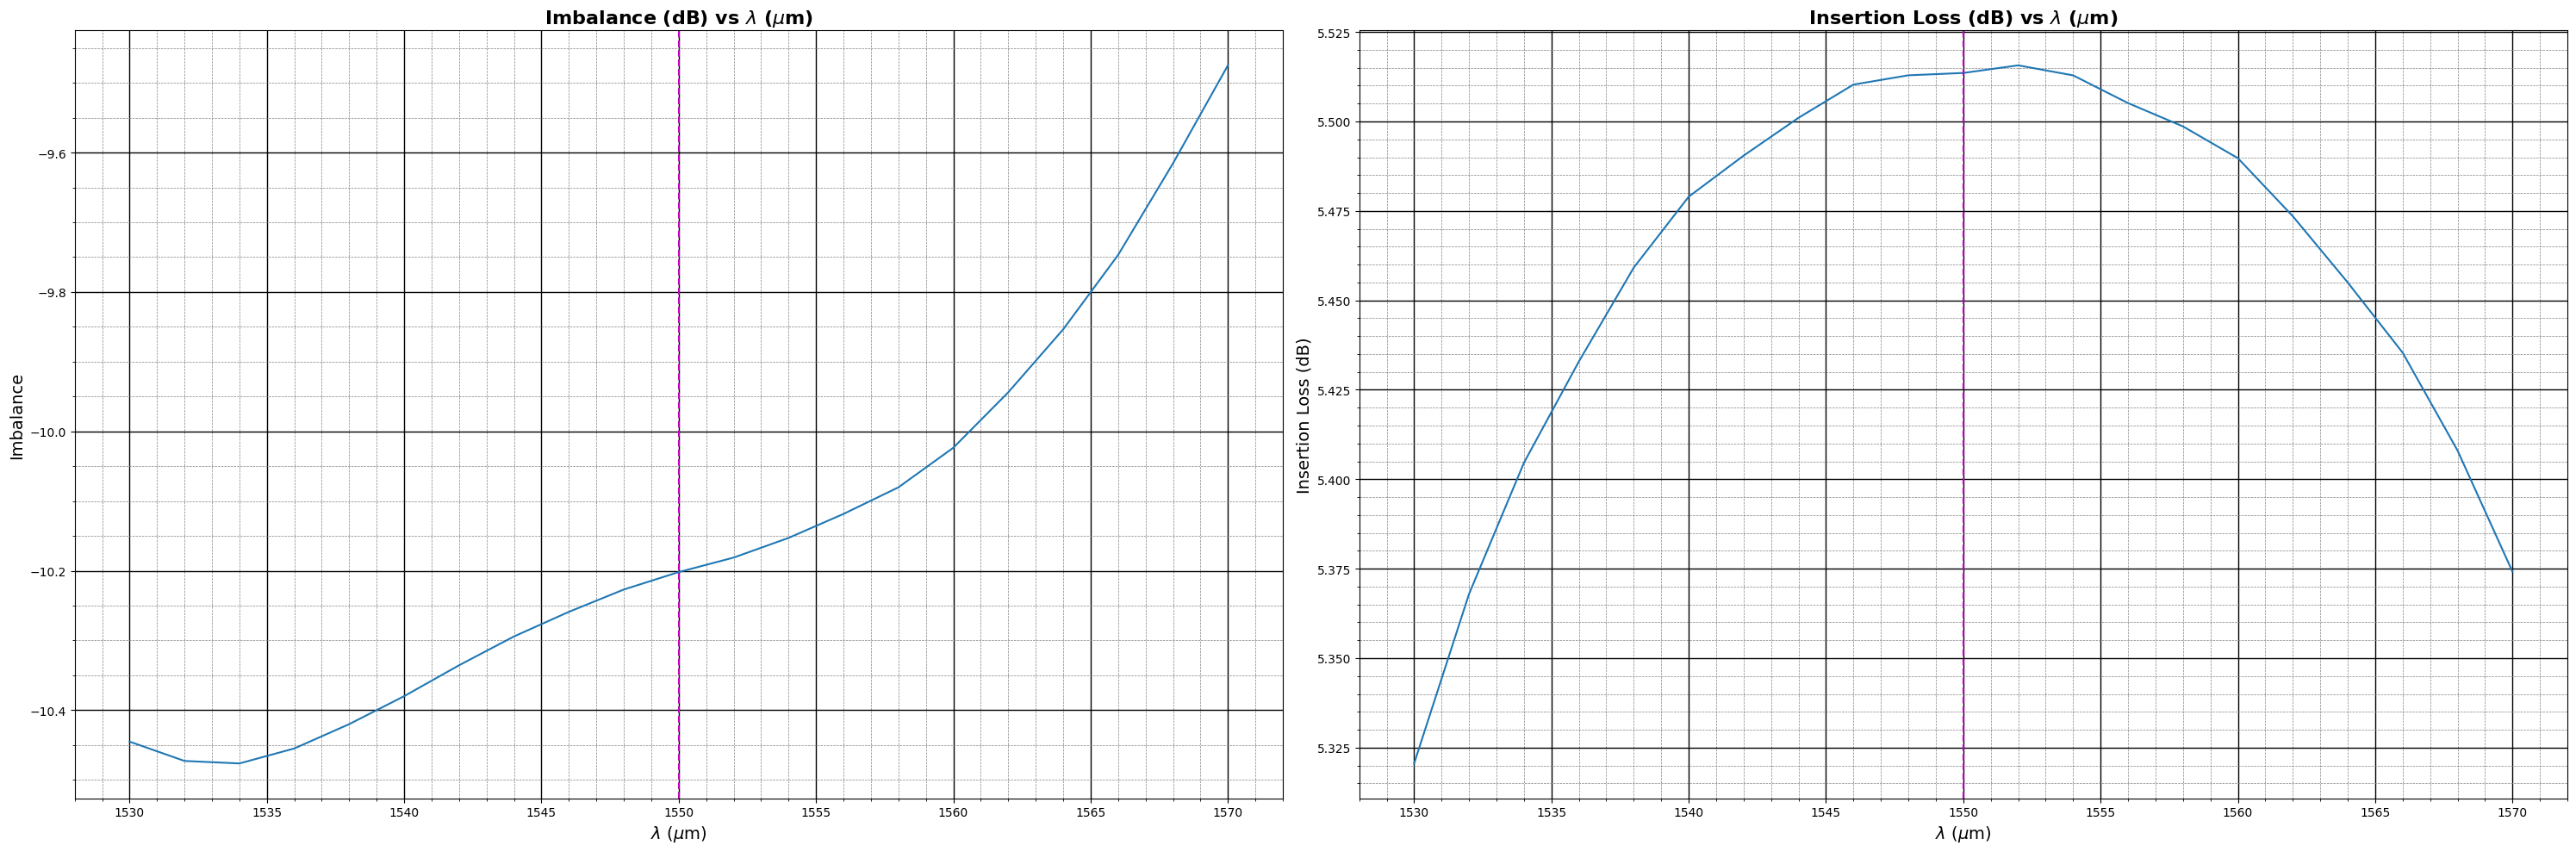

In [60]:
fig, axs = plt.subplots(1, 2, figsize=(30, 10))

Lambda = np.linspace(start_wavelength, stop_wavelength, num_frequency_points, endpoint=True)

Ib = trans_01_dB - trans_11_dB
axs[0].plot(Lambda/nm, Ib, lw=1.5)
axs[0].set_xlabel(r'$\lambda$ ($\mu$m)', fontsize=14)
axs[0].set_ylabel('Imbalance', fontsize=14)
axs[0].set_title(r'Imbalance (dB) vs $\lambda$ ($\mu$m)', fontsize=16, fontweight = 'bold')
axs[0].grid(True, which='major', linestyle='-', linewidth=1, color='black')
axs[0].grid(True, which='minor', linestyle='--', linewidth=0.5, color='gray')
axs[0].minorticks_on()
axs[0].axvline(x=lmbd/nm, color='m', linestyle='--')

Il = -10*np.log10(trans_01['T'] + trans_11['T'])
axs[1].plot(Lambda/nm, Il, lw=1.5)
axs[1].set_xlabel(r'$\lambda$ ($\mu$m)', fontsize=14)
axs[1].set_ylabel('Insertion Loss (dB)', fontsize=14)
axs[1].set_title(r'Insertion Loss (dB) vs $\lambda$ ($\mu$m)', fontsize=16, fontweight = 'bold')
axs[1].grid(True, which='major', linestyle='-', linewidth=1, color='black')
axs[1].grid(True, which='minor', linestyle='--', linewidth=0.5, color='gray')
axs[1].minorticks_on()
axs[1].axvline(x=lmbd/nm, color='m', linestyle='--')

plt.tight_layout()
plt.savefig('Imbalance e Perda de Inserção nas portas - FDTD - TM.png')
plt.show()

In [17]:
file_path = r"G:\Outros computadores\Meu laptop - Pessoal\Engenharia Eletrica\Projeto\Adolfo\MMI\Interconect_TE_Transmissao_FDTD.txt"

port_00_data = []
port_01_data = []
port_10_data = []
port_11_data = []

current_port = None

with open(file_path, 'r') as file:
    for line in file:
        if 'port_01' in line:
            current_port = 'Port_01'
            continue
        elif 'port_10' in line:
            current_port = 'Port_10'
            continue
        elif 'port_11' in line:
            current_port = 'Port_11'
            continue

        try:
            wavelength, transmission = map(float, line.strip().split(','))
            if current_port == 'Port_01':
                port_01_data.append((wavelength, transmission))
            elif current_port == 'Port_10':
                port_10_data.append((wavelength, transmission))
            elif current_port == 'Port_11':
                port_11_data.append((wavelength, transmission))
        except ValueError:
            continue

port_00_data = [(wavelength, 1) for wavelength, _ in port_01_data]

trans_00 = pd.DataFrame(port_00_data, columns=['wavelength', 'transmission'])
trans_01 = pd.DataFrame(port_01_data, columns=['wavelength', 'transmission'])
trans_10 = pd.DataFrame(port_10_data, columns=['wavelength', 'transmission'])
trans_11 = pd.DataFrame(port_11_data, columns=['wavelength', 'transmission'])

file_path = r"G:\Outros computadores\Meu laptop - Pessoal\Engenharia Eletrica\Projeto\Adolfo\MMI\Interconect_TE_ganho_FDTD.txt"

port_00_data = []
port_01_data = []
port_10_data = []
port_11_data = []

current_port = None

with open(file_path, 'r') as file:
    for line in file:
        if 'port_01' in line:
            current_port = 'Port_01'
            continue
        elif 'port_10' in line:
            current_port = 'Port_10'
            continue
        elif 'port_11' in line:
            current_port = 'Port_11'
            continue

        try:
            wavelength, transmission = map(float, line.strip().split(','))
            if current_port == 'Port_01':
                port_01_data.append((wavelength, transmission))
            elif current_port == 'Port_10':
                port_10_data.append((wavelength, transmission))
            elif current_port == 'Port_11':
                port_11_data.append((wavelength, transmission))
        except ValueError:
            continue

port_00_data = [(wavelength, 0) for wavelength, _ in port_01_data]

trans_00_dB = pd.DataFrame(port_00_data, columns=['wavelength', 'transmission'])
trans_01_dB = pd.DataFrame(port_01_data, columns=['wavelength', 'transmission'])
trans_10_dB = pd.DataFrame(port_10_data, columns=['wavelength', 'transmission'])
trans_11_dB = pd.DataFrame(port_11_data, columns=['wavelength', 'transmission'])

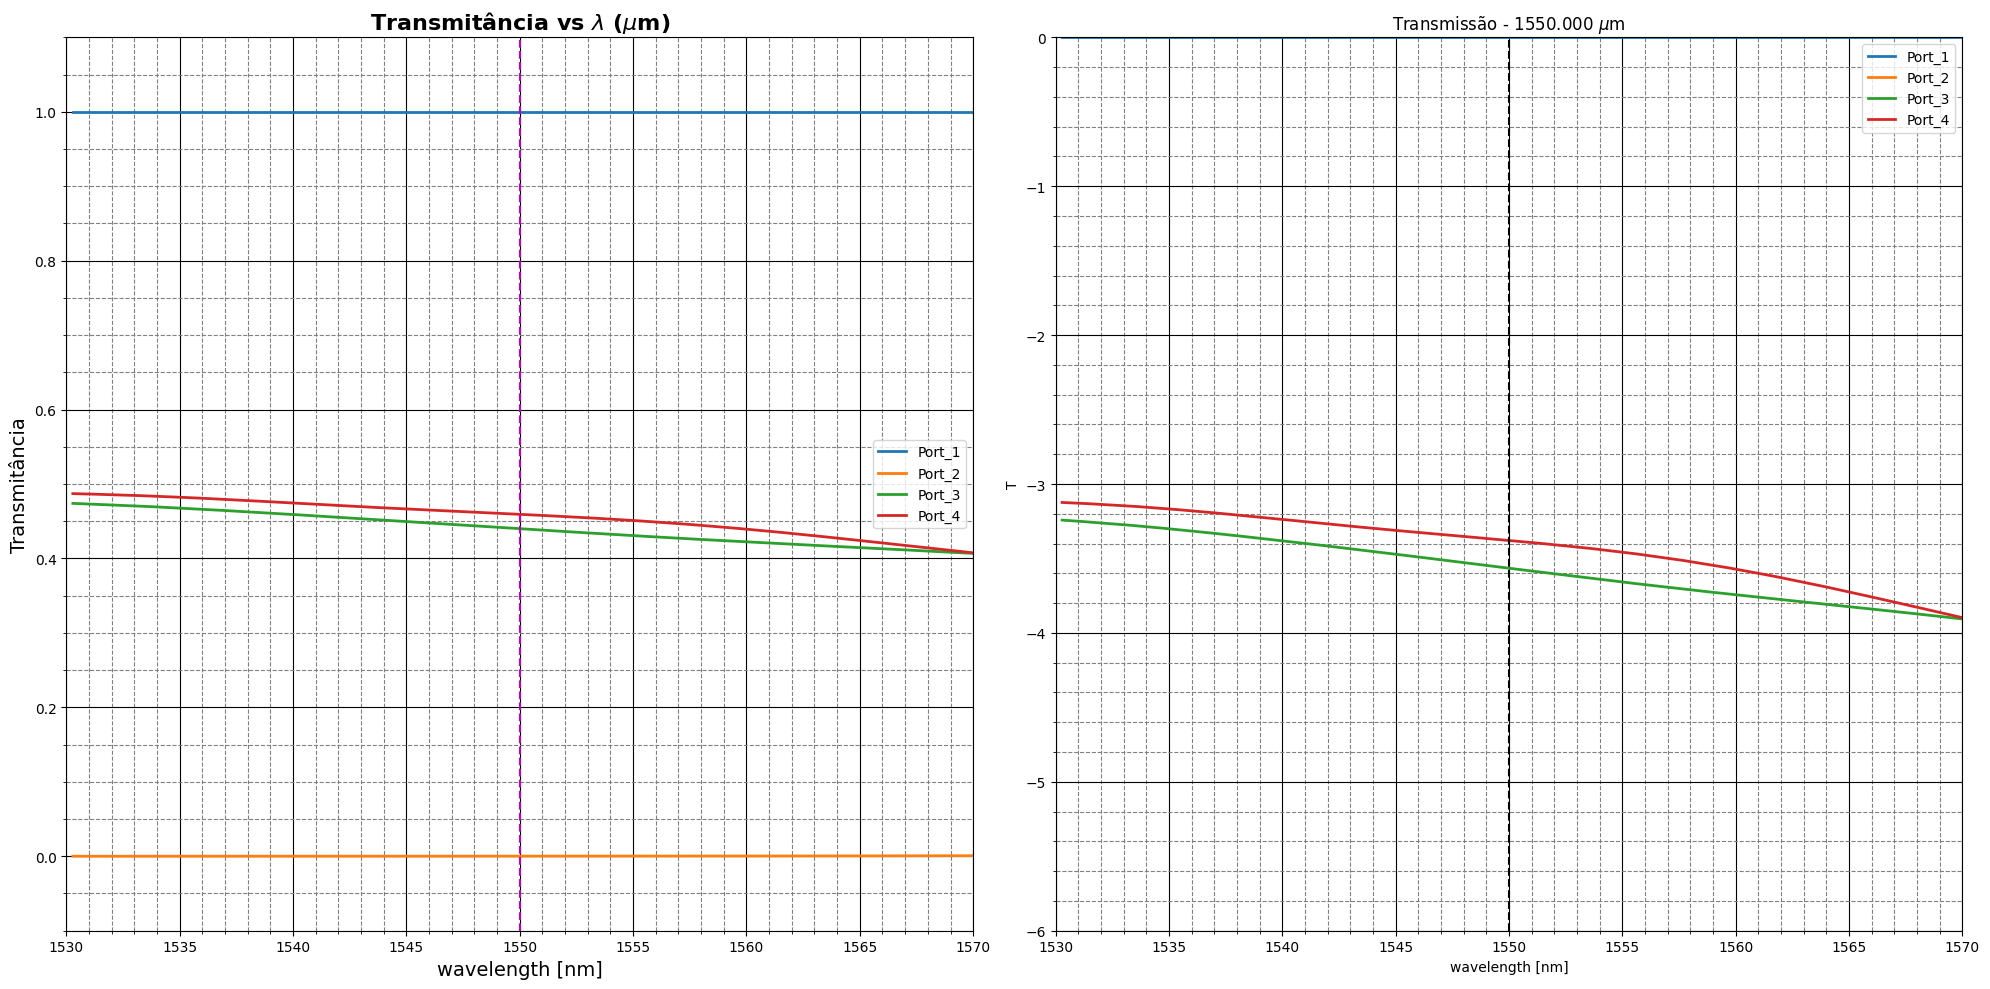

In [18]:
valor_lambda = 1550

fig, axs = plt.subplots(1, 2, figsize=(20, 10))

axs[0].plot(trans_00['wavelength'], trans_00['transmission'], label='Port_1', linewidth=2)
axs[0].plot(trans_10['wavelength'], trans_10['transmission'], label='Port_2', linewidth=2)
axs[0].plot(trans_01['wavelength'], trans_01['transmission'], label='Port_3', linewidth=2)
axs[0].plot(trans_11['wavelength'], trans_11['transmission'], label='Port_4', linewidth=2)
axs[0].axvline(x=valor_lambda, color='m', linestyle='--')
axs[0].set_xlabel(r'wavelength [nm]', fontsize=14)
axs[0].set_ylabel('Transmitância', fontsize=14)
axs[0].set_xlim([start_wavelength/nm, stop_wavelength/nm])
axs[0].set_ylim([-0.1,1.1])
axs[0].set_title(r'Transmitância vs $\lambda$ ($\mu$m)', fontsize=16, fontweight = 'bold',)
axs[0].legend()
axs[0].grid(which='major', color='black', linestyle='-')
axs[0].grid(which='minor', color='gray', linestyle='--')
axs[0].minorticks_on()

axs[1].plot(trans_00_dB['wavelength'], trans_00_dB['transmission'], label='Port_1', linewidth=2)
axs[1].plot(trans_10_dB['wavelength'], trans_10_dB['transmission'], label='Port_2', linewidth=2)
axs[1].plot(trans_01_dB['wavelength'], trans_01_dB['transmission'], label='Port_3', linewidth=2)
axs[1].plot(trans_11_dB['wavelength'], trans_11_dB['transmission'], label='Port_4', linewidth=2)
axs[1].axvline(x=valor_lambda, color='k', linestyle='--')
axs[1].set_xlabel(r'wavelength [nm]')
axs[1].set_ylabel('T')
axs[1].set_xlim([start_wavelength/nm, stop_wavelength/nm])
axs[1].set_ylim([-6,0])
axs[1].set_title(r'Transmissão - %4.3f $\mu$m'%valor_lambda)
axs[1].legend()
axs[1].grid(which='major', color='black', linestyle='-')
axs[1].grid(which='minor', color='gray', linestyle='--')
axs[1].minorticks_on()

plt.tight_layout()
plt.savefig('Transmissão nas portas - INTERCONECT(FDTD) - TE.png')
plt.show()

In [8]:
file_path = r"G:\Outros computadores\Meu laptop - Pessoal\Engenharia Eletrica\Projeto\Adolfo\MMI\Interconect_TM_Transmissao_FDTD.txt"

port_00_data = []
port_01_data = []
port_10_data = []
port_11_data = []

current_port = None

with open(file_path, 'r') as file:
    for line in file:
        if 'port_01' in line:
            current_port = 'Port_01'
            continue
        elif 'port_10' in line:
            current_port = 'Port_10'
            continue
        elif 'port_11' in line:
            current_port = 'Port_11'
            continue

        try:
            wavelength, transmission = map(float, line.strip().split(','))
            if current_port == 'Port_01':
                port_01_data.append((wavelength, transmission))
            elif current_port == 'Port_10':
                port_10_data.append((wavelength, transmission))
            elif current_port == 'Port_11':
                port_11_data.append((wavelength, transmission))
        except ValueError:
            continue

port_00_data = [(wavelength, 1) for wavelength, _ in port_01_data]

trans_00 = pd.DataFrame(port_00_data, columns=['wavelength', 'transmission'])
trans_01 = pd.DataFrame(port_01_data, columns=['wavelength', 'transmission'])
trans_10 = pd.DataFrame(port_10_data, columns=['wavelength', 'transmission'])
trans_11 = pd.DataFrame(port_11_data, columns=['wavelength', 'transmission'])

file_path = r"G:\Outros computadores\Meu laptop - Pessoal\Engenharia Eletrica\Projeto\Adolfo\MMI\Interconect_TM_ganho_FDTD.txt"

port_00_data = []
port_01_data = []
port_10_data = []
port_11_data = []

current_port = None

with open(file_path, 'r') as file:
    for line in file:
        if 'port_01' in line:
            current_port = 'Port_01'
            continue
        elif 'port_10' in line:
            current_port = 'Port_10'
            continue
        elif 'port_11' in line:
            current_port = 'Port_11'
            continue

        try:
            wavelength, transmission = map(float, line.strip().split(','))
            if current_port == 'Port_01':
                port_01_data.append((wavelength, transmission))
            elif current_port == 'Port_10':
                port_10_data.append((wavelength, transmission))
            elif current_port == 'Port_11':
                port_11_data.append((wavelength, transmission))
        except ValueError:
            continue

port_00_data = [(wavelength, 0) for wavelength, _ in port_01_data]

trans_00_dB = pd.DataFrame(port_00_data, columns=['wavelength', 'transmission'])
trans_01_dB = pd.DataFrame(port_01_data, columns=['wavelength', 'transmission'])
trans_10_dB = pd.DataFrame(port_10_data, columns=['wavelength', 'transmission'])
trans_11_dB = pd.DataFrame(port_11_data, columns=['wavelength', 'transmission'])

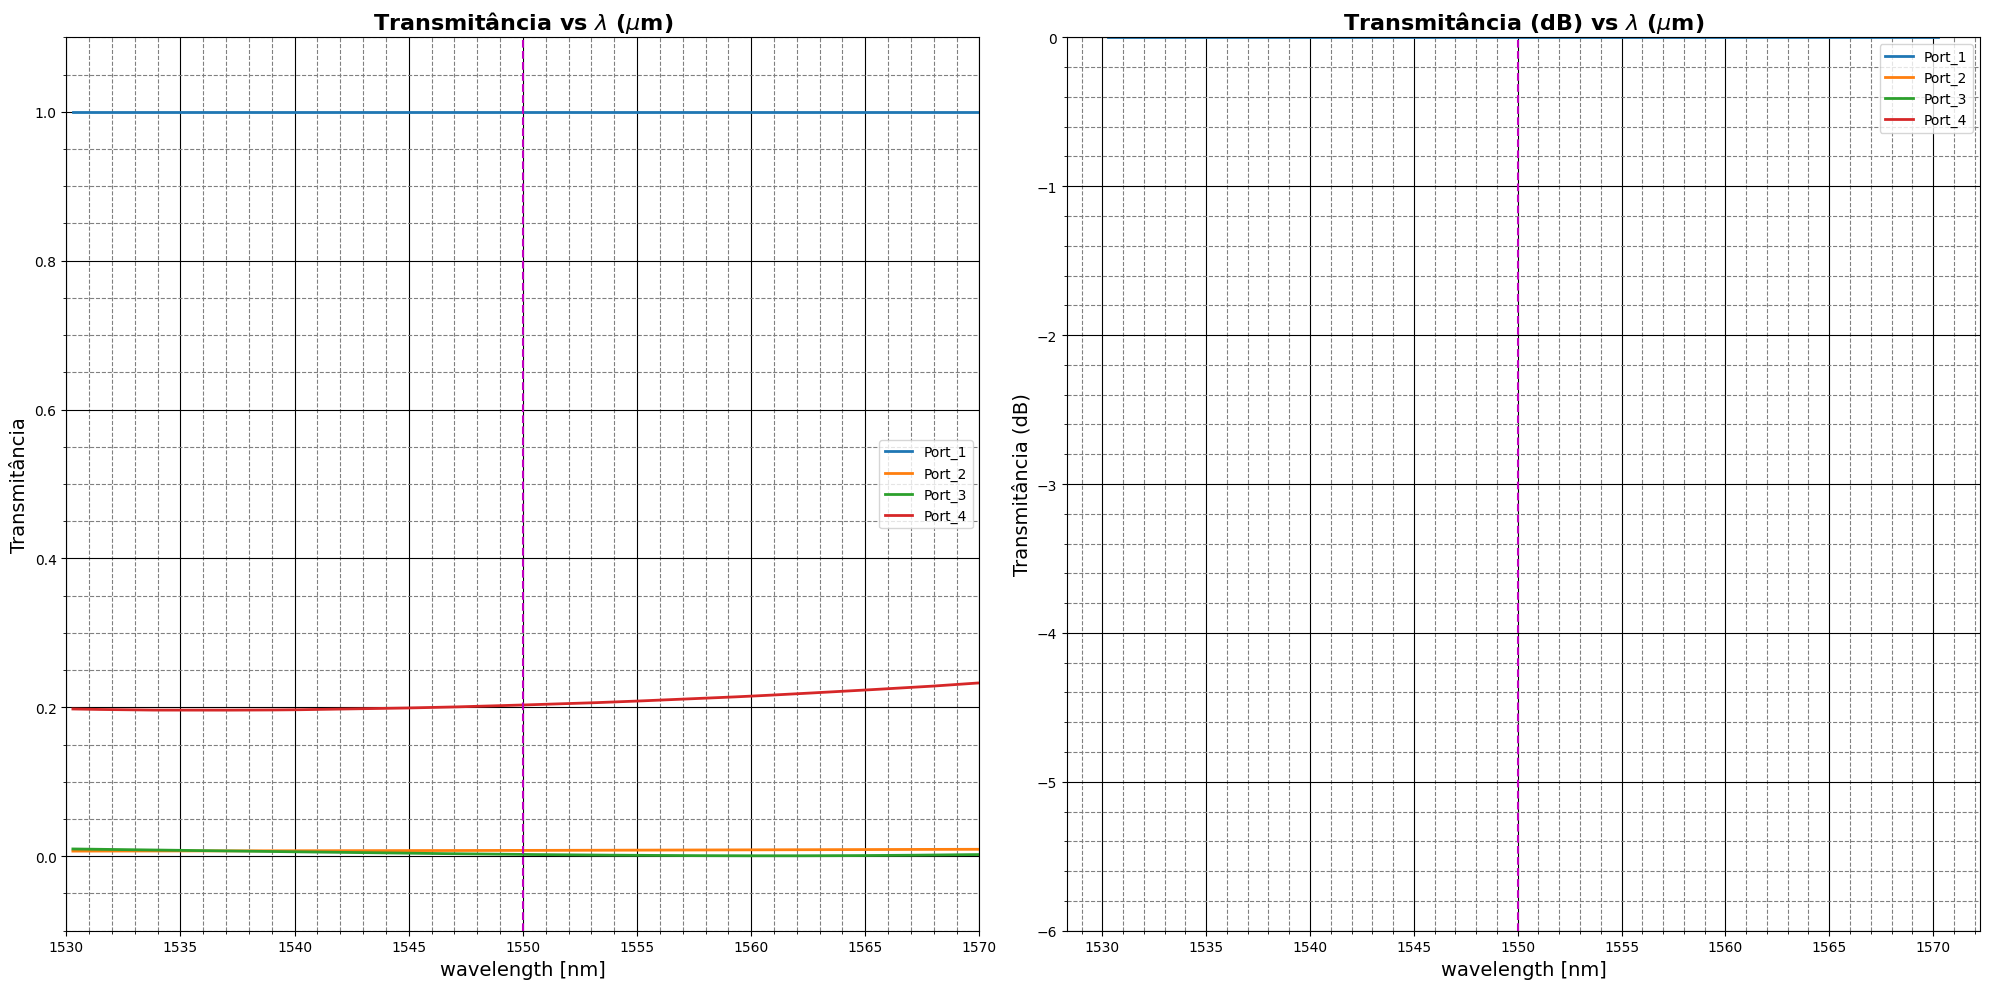

In [16]:
valor_lambda = 1550

fig, axs = plt.subplots(1, 2, figsize=(20, 10))

axs[0].plot(trans_00['wavelength'], trans_00['transmission'], label='Port_1', linewidth=2)
axs[0].plot(trans_10['wavelength'], trans_10['transmission'], label='Port_2', linewidth=2)
axs[0].plot(trans_01['wavelength'], trans_01['transmission'], label='Port_3', linewidth=2)
axs[0].plot(trans_11['wavelength'], trans_11['transmission'], label='Port_4', linewidth=2)
axs[0].axvline(x=valor_lambda, color='m', linestyle='--')
axs[0].set_xlabel(r'wavelength [nm]', fontsize=14)
axs[0].set_ylabel('Transmitância', fontsize=14)
axs[0].set_xlim([start_wavelength/nm, stop_wavelength/nm])
axs[0].set_ylim([-0.1,1.1])
axs[0].set_title(r'Transmitância vs $\lambda$ ($\mu$m)', fontsize=16, fontweight = 'bold',)
axs[0].legend()
axs[0].grid(which='major', color='black', linestyle='-')
axs[0].grid(which='minor', color='gray', linestyle='--')
axs[0].minorticks_on()

axs[1].plot(trans_00_dB['wavelength'], trans_00_dB['transmission'], label='Port_1', linewidth=2)
axs[1].plot(trans_10_dB['wavelength'], trans_10_dB['transmission'], label='Port_2', linewidth=2)
axs[1].plot(trans_01_dB['wavelength'], trans_01_dB['transmission'], label='Port_3', linewidth=2)
axs[1].plot(trans_11_dB['wavelength'], trans_11_dB['transmission'], label='Port_4', linewidth=2)
axs[1].axvline(x=valor_lambda, color='m', linestyle='--')
axs[1].set_xlabel(r'wavelength [nm]', fontsize=14)
axs[1].set_ylabel('Transmitância (dB)', fontsize=14)
axs[0].set_xlim([start_wavelength/nm, stop_wavelength/nm])
axs[1].set_ylim([-6,0])
axs[1].set_title(r'Transmitância (dB) vs $\lambda$ ($\mu$m)', fontsize=16, fontweight = 'bold',)
axs[1].legend()
axs[1].grid(which='major', color='black', linestyle='-')
axs[1].grid(which='minor', color='gray', linestyle='--')
axs[1].minorticks_on()

plt.tight_layout()
plt.savefig('Transmissão nas portas - INTERCONECT(FDTD) - TM.png')
plt.show()